In [1]:
"""
A change from the perceptron version of my data in Assignment 2:
Instead of try_int(), it has been made into try_float(), and that has resulted in the plot_decision_regions working correctly.
The perceptron of the irises used floats when they were converted into a dataframe. My data, however, were string values, which
I needed to convert into useable values. For Assignment 2, int values worked fine for the perceptron itself, but not for 
plotting the decision regions. 

In this assignment, I looked at both the Gradient Descent and Stochastic Gradient Descent of the iris_adaline jupyter notebook
files. In them, I noticed slight variances within the data, even though the line to separate each of them was extremely
similar. So, I wanted to push my dataset to see if I could find where there would be a noticeable change in the regions.
I will mostly be messing around with eta values and iterations to see what each does to the two models.

Originally I was going to use the Perceptron model to compare to the Adaline GD model, but unfortunately I still can't
figure out what's wrong with what happened in Assignment 2, so... yeah. ~The More You... Know?~ (TM)

"""

"\nA change from the perceptron version of my data in Assignment 2:\nInstead of try_int(), it has been made into try_float(), and that has resulted in the plot_decision_regions working correctly.\nThe perceptron of the irises used floats when they were converted into a dataframe. My data, however, were string values, which\nI needed to convert into useable values. For Assignment 2, int values worked fine for the perceptron itself, but not for \nplotting the decision regions. \n\nIn this assignment, I looked at both the Gradient Descent and Stochastic Gradient Descent of the iris_adaline jupyter notebook\nfiles. In them, I noticed slight variances within the data, even though the line to separate each of them was extremely\nsimilar. So, I wanted to push my dataset to see if I could find where there would be a noticeable change in the regions.\nI will mostly be messing around with eta values and iterations to see what each does to the two models.\n\nOriginally I was going to use the Perc

In [2]:
import numpy as np
import os
import pandas as pd

try:
    s = 'Computers.csv'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: Computers.csv


,0,1,2,3,4,5,6,7,8,9,10
6255,6255.0,1690,100,528,8,15,no,no,yes,39,35
6256,6256.0,2223,66,850,16,15,yes,yes,yes,39,35
6257,6257.0,2654,100,1200,24,15,yes,no,yes,39,35
6258,6258.0,2195,100,850,16,15,yes,no,yes,39,35
6259,6259.0,2490,100,850,16,17,yes,no,yes,39,35


In [3]:
# Attempts to convert a value into an int. If it is not able to, return the original element.

def try_float(s):
    try:
        f = float(s)
    except ValueError:
        return s
    return f

#Sift through which indexes of binary classification are zeros or ones. Returns two list of indexes.

def sift_binary(s):
    zeros = []
    ones = []
    index = 0
    t = s.tolist()
    for value in t:
        if value == 0:
            zeros.append(index)
        else:
            ones.append(index)
        index += 1
    return (zeros, ones)

In [4]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [5]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

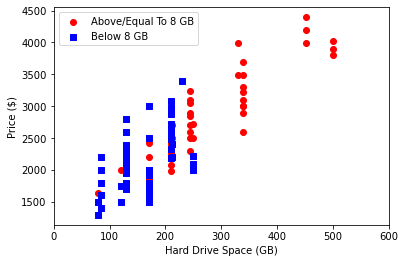

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Extract the first 100 values, disregarding the first value, which is the header

y = df.iloc[1:101, 4].values

# Set up binary classification, less othan 8 GB and greater than / equal to 8 GB
y = np.where((y == '8') | (y == '16'), 0, 1)

# Find which indexes contain zeros, and which ones contain ones; This will be used for accurate plotting
zeros, ones = sift_binary(y)

# Extract hard drive space and price of computer
X = df.iloc[1:101, [3, 1]].values

# Turn the values in X from str to int for the perceptron to use
Xfloat = np.copy(X)
Xfloat = X.astype(float)
# Turn hard drive values into floats; these will be used for scatter plot's x-axis
hard_drive_values = [x[0] for x in Xfloat]
hard_drive_values = [try_float(x) for x in hard_drive_values]

# Create lists that combine the indices from sift_binary(y) and the values from hard_drive_values
hdv_zeros = []
hdv_ones = []
for value in zeros:
    hdv_zeros.append(hard_drive_values[value])
for value in ones:
    hdv_ones.append(hard_drive_values[value])

# Create lists that combine the indices from sift_binary(y) and the values from price
price = [x[1] for x in Xfloat] 
price = [try_float(x) for x in price]
price_zeros = []
price_ones = []
for value in zeros:
    price_zeros.append(price[value])
for value in ones:
    price_ones.append(price[value])

# plot data

plt.scatter(hdv_zeros, price_zeros,
            color='red', marker='o', label='Above/Equal To 8 GB')
plt.scatter(hdv_ones, price_ones,
            color='blue', marker='s', label='Below 8 GB')


# Set xtick labels to appropriate values
plt.xticks(ticks = [0, 100, 200, 300, 400, 500, 600], labels = [0, 100, 200, 300, 400, 500, 600])

plt.xlabel('Hard Drive Space (GB)')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

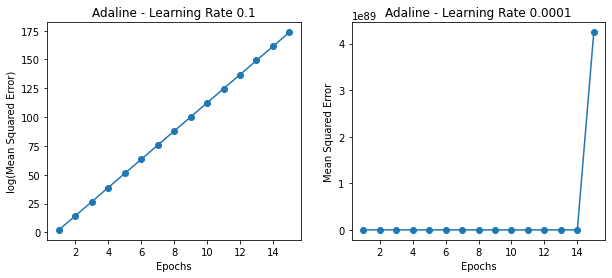

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(Xfloat, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(Xfloat, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Adaline - Learning Rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [9]:
# standardize features
X_std = np.copy(Xfloat)
X_std[:, 0] = (Xfloat[:, 0] - Xfloat[:, 0].mean()) / Xfloat[:, 0].std()
X_std[:, 1] = (Xfloat[:, 1] - Xfloat[:, 1].mean()) / Xfloat[:, 1].std()

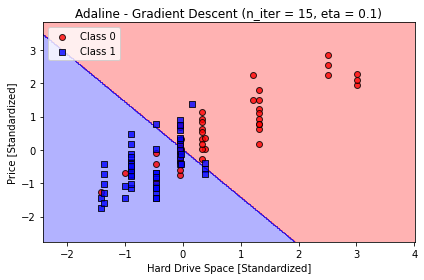

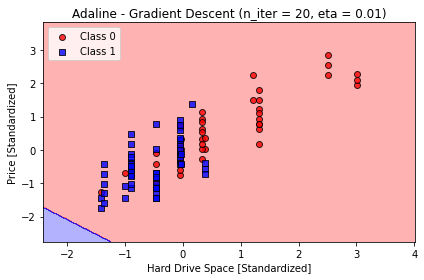

In [10]:
#Create two Adaline Gradient Descents and compare them depending on different n_iter and eta

ada_gd = AdalineGD(n_iter=15, eta=0.1)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent (n_iter = 15, eta = 0.1)')
plt.xlabel('Hard Drive Space [Standardized]')
plt.ylabel('Price [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

#-----------------------------------------------------------

ada_gd2 = AdalineGD(n_iter=20, eta=0.01)
ada_gd2.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd2)
plt.title('Adaline - Gradient Descent (n_iter = 20, eta = 0.01)')
plt.xlabel('Hard Drive Space [Standardized]')
plt.ylabel('Price [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()



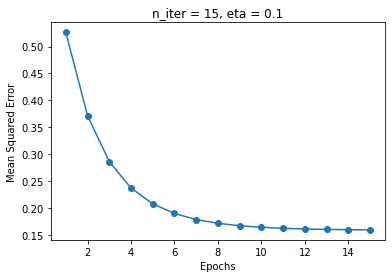

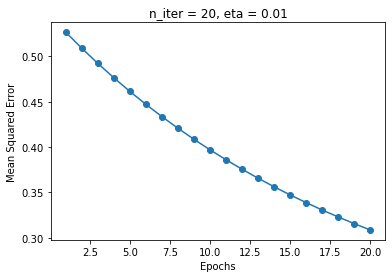

In [11]:
#Using the above graphs, create two plots that calculate the mean squared error of each

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('n_iter = 15, eta = 0.1')
plt.show()

#----------------------------------------------------------------------------

plt.plot(range(1, len(ada_gd2.losses_) + 1), ada_gd2.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('n_iter = 20, eta = 0.01')
plt.show()

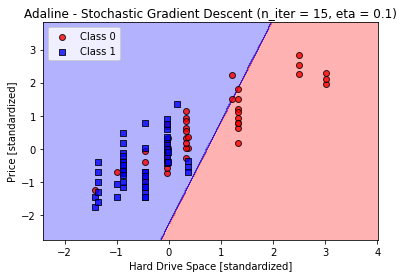

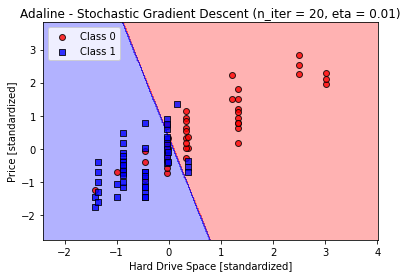

In [12]:
#Create two Adaline Stochastic Gradient Descents and compare them depending on different n_iter and eta

ada_sgd = AdalineSGD(n_iter=15, eta=0.1, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent (n_iter = 15, eta = 0.1)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.show()

#---------------------------------------------------------------

ada_sgd2 = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
ada_sgd2.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd2)
plt.title('Adaline - Stochastic Gradient Descent (n_iter = 20, eta = 0.01)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.show()




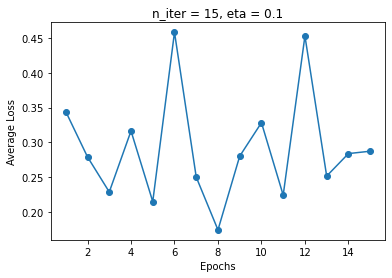

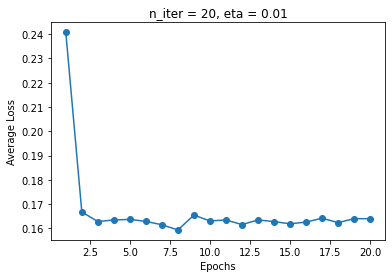

In [13]:
#Using the above graphs, create two plots that calculate the mean squared error of each

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('n_iter = 15, eta = 0.1')
plt.show()

#-------------------------------------------------------------------------------

plt.plot(range(1, len(ada_sgd2.losses_) + 1), ada_sgd2.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('n_iter = 20, eta = 0.01')
plt.show()

In [14]:
"""
So, the findings are:

In terms of Gradient Descent:

Between the two GD plots, the first plot that has an eta of 0.1 has a less average loss than the second one with an eta of 0.01,
despite having less iterations. This is most likely because the eta of 0.1 is a much better learning rate on a gradient descent
for my data (though that does not necessarily ring true for the stochastic gradient descent). As such, even with more 
iterations, the second plot requires more iterations in order to reach the same point as the first plot. Visually, the second 
plot barely classifies the points correctly, with all of the points being included in the red region, and none in the blue.

In terms of Stochastic Gradient Descent:
Compared to gradient descent, the error surface is much rougher than that of its cousin, which is as expected. Visually,
as well as in terms of average loss, SGD appears to have a lower average loss on average when it gets closer to the optimal
classification, as shown between the GD of (n_iter = 15) and the SGD of (n_iter = 20). 

Between the two SGD plots, the first plot that has an eta of 0.1 has an extremely rough error surface compared to the second
plot with an eta of 0.01. This is most likely because the learning rate of 0.1 overshoots the global minimum, resulting in
the zig-zag-style graph it is showing. Visually, this is also shown through how many red dots it includes within the blue
region compared to the second graph, which - while failing to classify some red dots properly, is much more accurate.

Interesting Things to Note:

When plotting the epochs vs mean squared error (second graph, entirely flat and then high spike at the end) after initially 
running the Adaline model, changing the learning rate or the iterations had NO difference in terms of the plot structure.
There is also an odd 1e^89 on top of the y axis that the first graph does not have, which I cannot identify.

Despite the fact that SGD and GD are made with the same goal in mind, the plots and their iterations/learning rates have swapped 
results in terms of accuracy with my data. For GD, a higher learning rate yielded a more concise graph; for SGD, a lower 
learning rate yielded a more concise graph. 


"""

'\nSo, the findings are:\n\nIn terms of Gradient Descent:\n\nBetween the two GD plots, the first plot that has an eta of 0.1 has a less average loss than the second one with an eta of 0.01,\ndespite having less iterations. This is most likely because the eta of 0.1 is a much better learning rate on a gradient descent\nfor my data (though that does not necessarily ring true for the stochastic gradient descent). As such, even with more \niterations, the second plot requires more iterations in order to reach the same point as the first plot. Visually, the second \nplot barely classifies the points correctly, with all of the points being included in the red region, and none in the blue.\n\nIn terms of Stochastic Gradient Descent:\nCompared to gradient descent, the error surface is much rougher than that of its cousin, which is as expected. Visually,\nas well as in terms of average loss, SGD appears to have a lower average loss on average when it gets closer to the optimal\nclassification, 